In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
import warnings
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf', 'svg')
set_matplotlib_formats('retina')
plt.rcParams['figure.dpi'] = 60
warnings.filterwarnings("ignore", category=UserWarning)

/tmp/ipykernel_2827723/1135838720.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf', 'svg')
/tmp/ipykernel_2827723/1135838720.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
df = pd.read_parquet('/vols/cms/hw423/Data/sampled.parquet').reset_index(drop=True)


In [3]:
dfx = df.iloc[:,:141].dropna().reset_index(drop=True)
dfx


,leadPhotonEn,leadPhotonMass,leadPhotonPt,leadPhotonEta,leadPhotonPhi,leadPhotonIDMVA,leadPhotonSigmaE,leadPhotonHoE,leadPhotonPfRelIsoAll,leadPhotonPfRelIsoChg,...,dijetDiphoAbsDEta,leadJetDiphoDPhi,leadJetDiphoDEta,subleadJetDiphoDPhi,subleadJetDiphoDEta,nSoftJets,metPt,metPhi,metSumET,metSignificance
0,84.111893,-9.536743e-07,61.416336,-0.835205,0.045105,0.547852,0.937500,0.000000,0.027564,0.027485,...,-999.000000,-0.526204,0.435430,-999.000000,-999.000000,6.0,37.868931,-0.462341,1260.0,2.935547
1,170.214096,3.303625e-06,103.086166,1.086914,2.283691,0.954102,2.562500,0.000000,0.000000,0.000000,...,0.109908,-2.510166,-2.305647,-2.020267,0.481279,6.0,33.930840,-1.981689,1147.0,2.687500
2,85.678589,9.536743e-07,60.788967,-0.876587,-0.399536,0.982422,0.882812,0.000000,0.000000,0.000000,...,2.727842,-2.835198,-1.986473,1.924079,-0.502098,6.0,36.711575,1.493652,2044.0,1.544922
3,74.116653,-1.348699e-06,54.140640,0.834595,1.329834,0.848633,0.804688,0.000000,0.015211,0.015211,...,2.506697,0.924295,-0.391488,-2.150412,2.718863,6.0,52.603382,0.288818,1420.0,4.464844
4,239.627075,-3.814697e-06,85.310364,1.692627,2.092773,0.951172,5.000000,0.003647,0.000000,0.000000,...,1.547848,-1.379771,-1.206214,1.668734,-2.476050,6.0,317.029358,-0.989624,2464.0,117.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499974,233.883240,0.000000e+00,62.137428,2.000488,-3.129395,0.909668,4.812500,0.015930,0.029254,0.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,6.0,23.183462,1.131592,935.5,1.721680
499975,139.046616,-1.907349e-06,100.324913,-0.852539,-2.088379,-0.535645,1.406250,0.000000,0.089084,0.064279,...,3.164442,2.734409,1.119880,-1.906686,3.798591,6.0,78.260696,1.685059,1508.0,10.007812
499976,93.878357,0.000000e+00,78.386932,0.618774,-1.374756,0.943359,0.976562,0.000000,0.000000,0.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,6.0,26.360491,-2.345215,835.0,2.007812
499977,104.100464,1.348699e-06,84.927315,0.659912,1.435791,0.948730,1.078125,0.000000,0.000000,0.000000,...,2.445197,-2.247024,-0.491946,2.716154,3.260556,6.0,60.352196,1.565186,2358.0,3.710938


In [4]:
MI = np.zeros((141,7))
MIcol = np.zeros(141)

In [5]:
col = ['$\gamma\gamma$','ggH','qqH','WH','ZH','ttH','tH']

In [6]:
dfl = df['proc']
dfl = dfl[dfx.index]
dfy = pd.get_dummies(dfl)


In [8]:
dfy.idxmax(axis=1)

0         0
1         2
2         0
3         6
4         6
         ..
499974    1
499975    1
499976    1
499977    0
499978    1
Length: 499979, dtype: int64

In [7]:
for i in range(141):
    for j in range(7):
        dfy1 = dfy.iloc[:,j].reset_index(drop=True)
        y1= np.array(dfy1)
        df1=  dfx.iloc[:,i].reset_index(drop=True)
        x1 = np.array(df1).flatten()
        MI[i,j]= mutual_info_score(x1,y1)
        

KeyboardInterrupt: 

In [ ]:
for i in range(141):
    df1=  dfx.iloc[:,i].reset_index(drop=True)
    x1 = np.array(df1).flatten()
    MIcol[i]= mutual_info_score(x1,dfl)

In [15]:
MIcol

array([1.47250647e+00, 5.50437259e-04, 1.46760610e+00, 2.43184302e-01,
       2.21857880e-01, 5.37295249e-02, 3.00733512e-03, 1.20526635e-02,
       9.15442219e-01, 6.37289152e-01, 6.86199743e-03, 1.41121063e-02,
       1.43498309e-05, 1.37745656e-05, 1.45440509e+00, 4.30907147e-04,
       1.44744794e+00, 2.41467024e-01, 2.22092067e-01, 5.65660584e-02,
       2.77533258e-03, 1.13878363e-02, 9.00831130e-01, 6.46556968e-01,
       8.09583063e-03, 1.70091454e-02, 2.72770088e-05, 1.19393478e-05,
       7.46475087e-02, 4.67797359e-04, 7.45976000e-02, 5.83759453e-02,
       5.42911607e-02, 2.01962987e-02, 2.59397138e-03, 8.77782217e-03,
       5.59242839e-02, 4.52987795e-02, 7.57755114e-03, 1.07703691e-02,
       1.03675027e-04, 1.04570945e-04, 1.27811095e+00, 3.14749009e-02,
       1.27595127e+00, 2.54788004e-01, 2.14948472e-01, 5.16182091e-02,
       1.59486825e-04, 1.79344658e-04, 4.40958832e-02, 9.67892051e-01,
       2.74437854e-02, 9.65633289e-01, 2.32107591e-01, 1.95054860e-01,
      

In [10]:
dfMIcol = pd.DataFrame(MIcol,index=dfx.columns,columns = ['MI'])

In [17]:
MIC = MI.sum(axis=0)
MIN = []
for i in range(7):
    MIN.append(MI[:,i]/MIC[i])

In [18]:
dfMI = pd.DataFrame(np.array(MIN).T,index=dfx.columns,columns=col).drop(['diphotonMass'])
dfMI

,$\gamma\gamma$,ggH,qqH,WH,ZH,ttH,tH
leadPhotonEn,3.493399e-02,3.444674e-02,3.433328e-02,0.029786,0.028827,0.031746,0.034421
leadPhotonMass,5.975109e-06,6.561692e-06,7.592036e-06,0.000063,0.000084,0.000016,0.000008
leadPhotonPt,3.477176e-02,3.429491e-02,3.419366e-02,0.029725,0.028837,0.031657,0.034269
leadPhotonEta,3.409518e-03,4.615833e-03,4.397300e-03,0.012282,0.013610,0.008334,0.003813
leadPhotonPhi,3.192432e-03,4.253836e-03,4.021829e-03,0.011435,0.012446,0.007342,0.003507
...,...,...,...,...,...,...,...
nSoftJets,7.720352e-07,7.072056e-07,2.844178e-07,0.000006,0.000004,0.000002,0.000001
metPt,3.496261e-02,3.446707e-02,3.436131e-02,0.029807,0.028819,0.031766,0.034471
metPhi,2.994369e-03,3.917569e-03,3.738584e-03,0.010351,0.011922,0.006656,0.003306
metSumET,2.264807e-04,3.099453e-04,3.055636e-04,0.002056,0.003226,0.000796,0.000272


In [19]:
MIlist = pd.DataFrame(dfMI.T.sum(axis=0),index = dfMI.index,columns=['MI'])


In [20]:
MIlist.sort_values(by='MI',ascending=False)*6


,MI
metPt,1.371926
leadPhotonEn,1.370967
leadPhotonPt,1.366489
diphotonEta,1.360343
diphotonPhi,1.359089
...,...
subsubleadMuonMass,0.000011
subsubleadElectronCharge,0.000008
subleadElectronConvVeto,0.000005
subsubleadElectronConvVeto,0.000004


In [71]:
dfMIcol.round(2).sort_values(by=['MI'],ascending=False).to_csv('/vols/cms/hw423/WeekF/MI.csv')


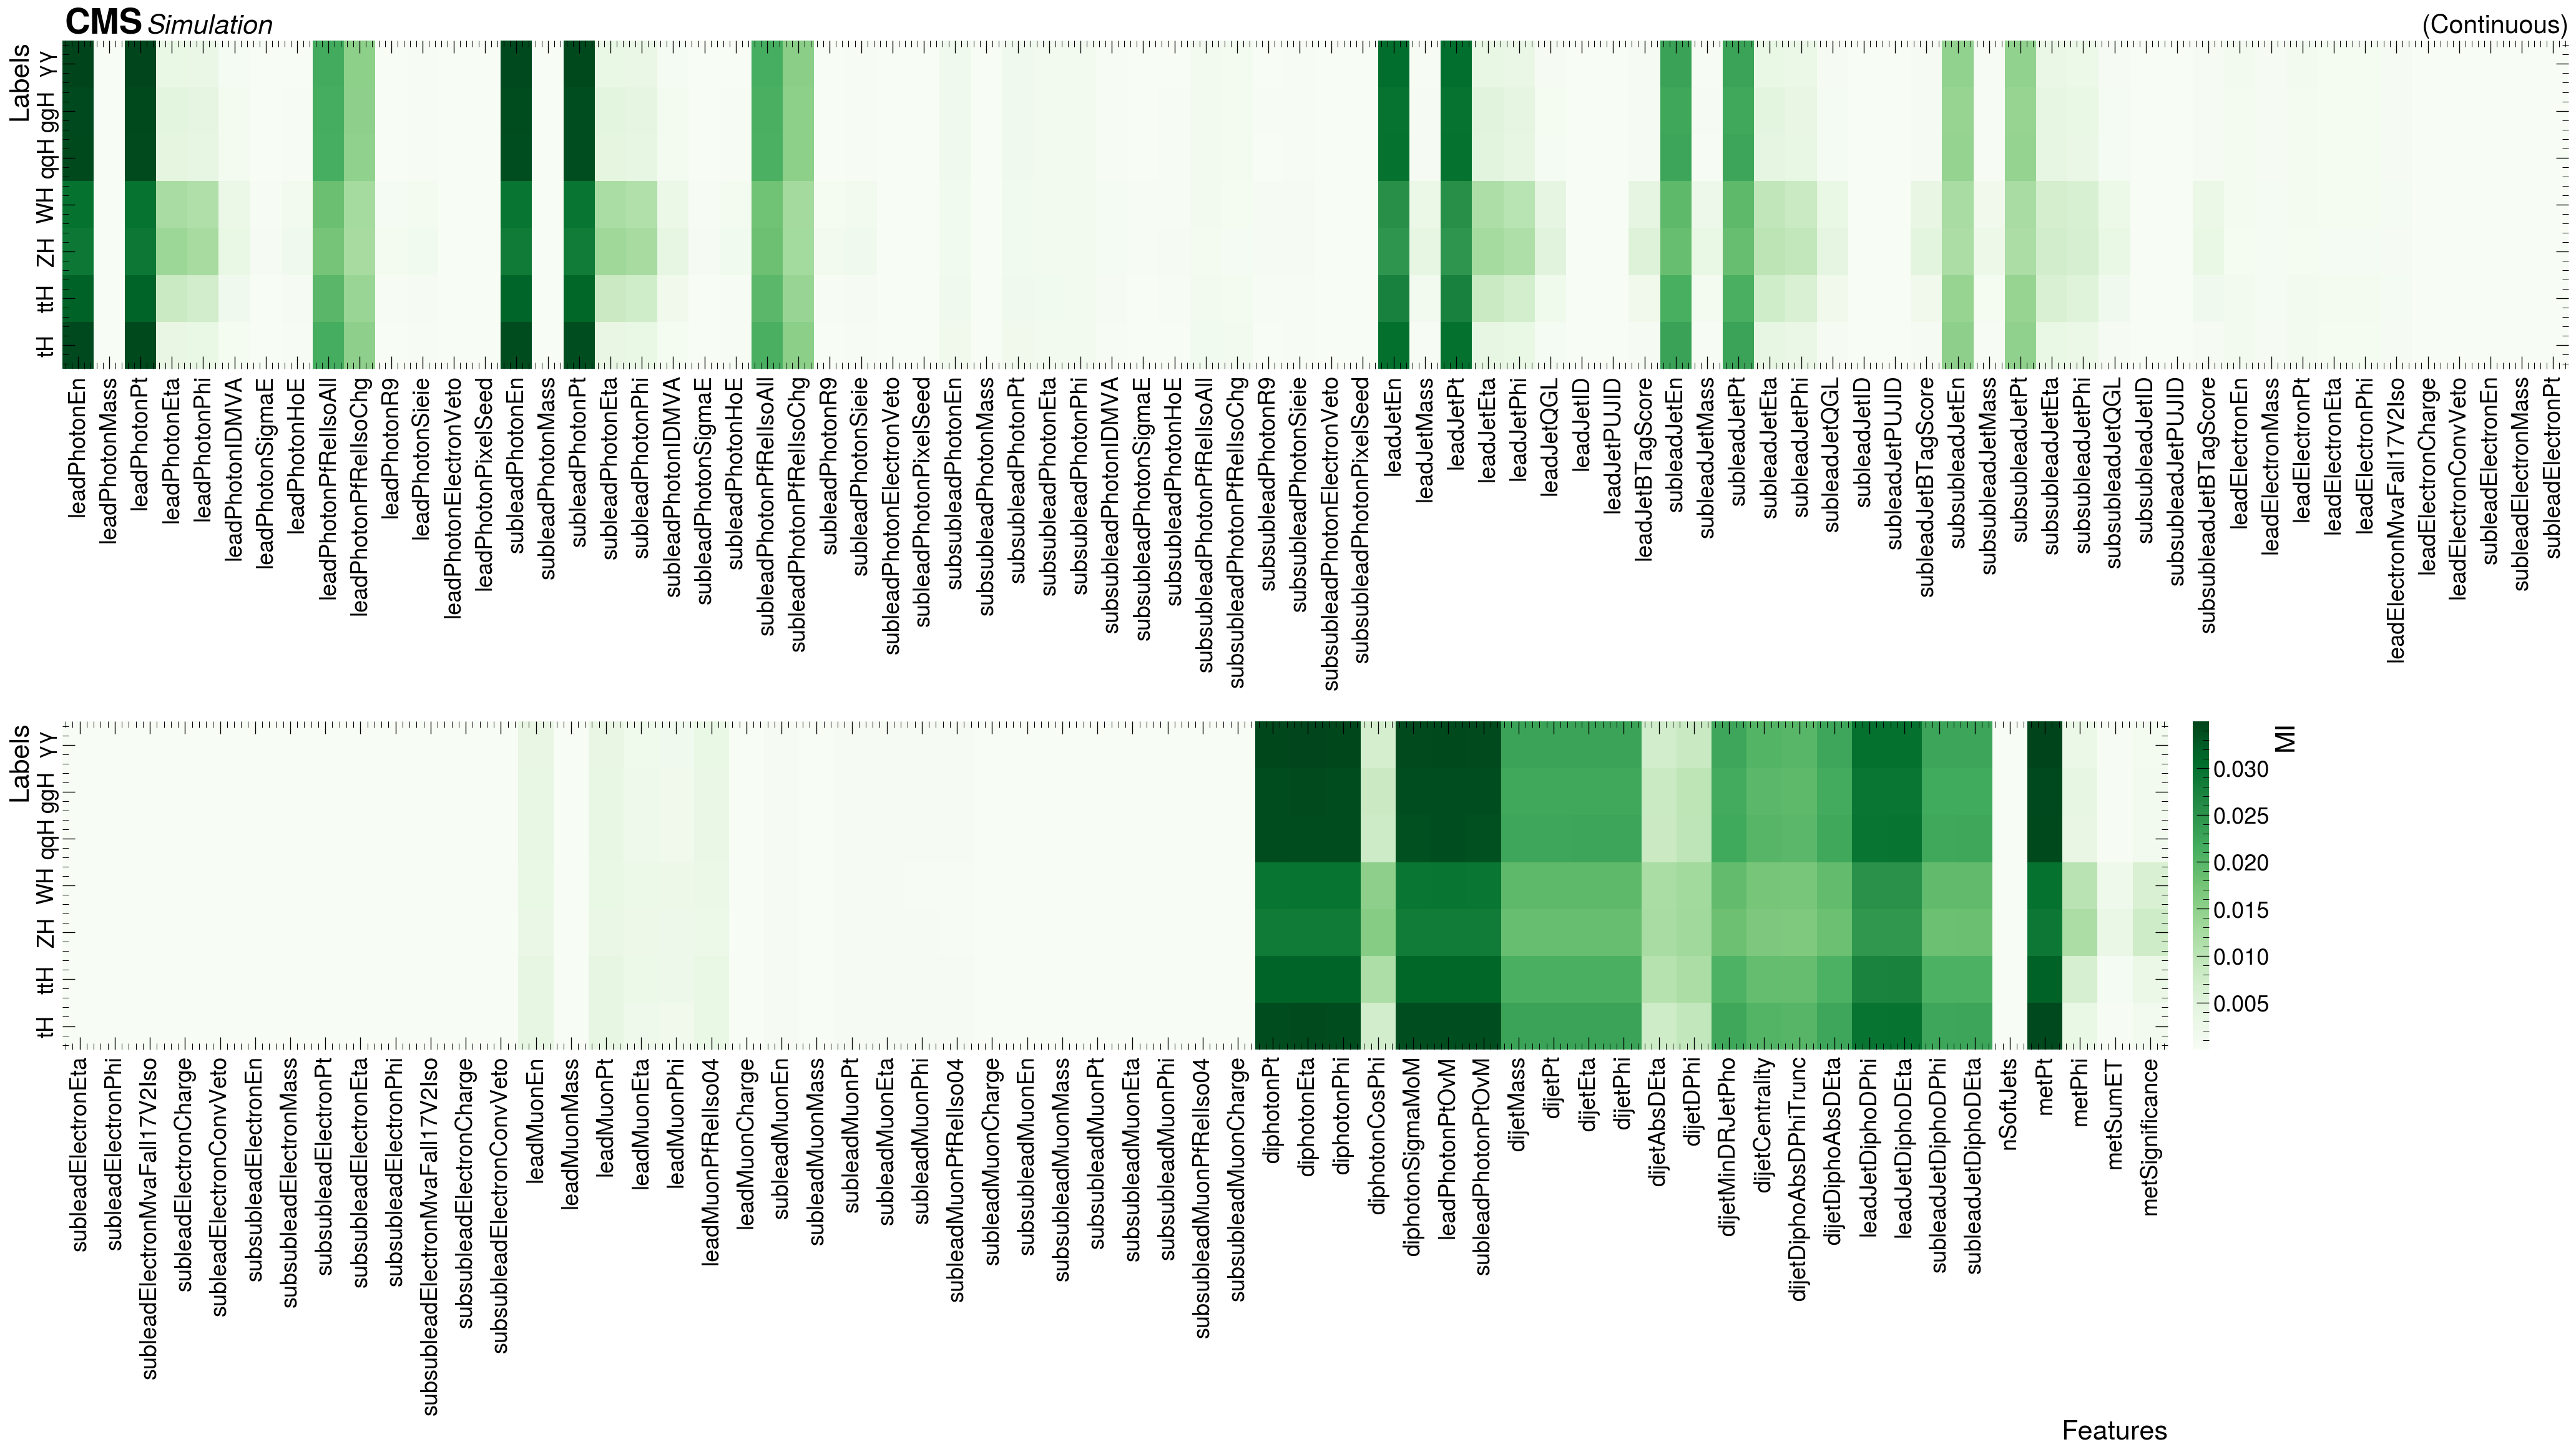

In [64]:
import seaborn as sns
fig,ax = plt.subplots(2,1,figsize=(35,20))
sns.heatmap(dfMI.iloc[:80,:].T,cmap='Greens',cbar=False,ax=ax[0])
sns.heatmap(dfMI.iloc[80:,:].T,cmap='Greens',cbar_kws={"pad": 0.01},ax=ax[1])
hep.cms.label(ax=ax[0],rlabel="(Continuous)")
ax[1].set_xlabel('Features')
ax[0].set_ylabel('Labels')
ax[1].set_ylabel('Labels')
plt.subplots_adjust(hspace=4)
cbar = ax[1].collections[0].colorbar
cbar.set_label('MI')
fig.tight_layout()
fig.savefig('/vols/cms/hw423/WeekF/plots/MI.pdf',bbox_inches='tight')



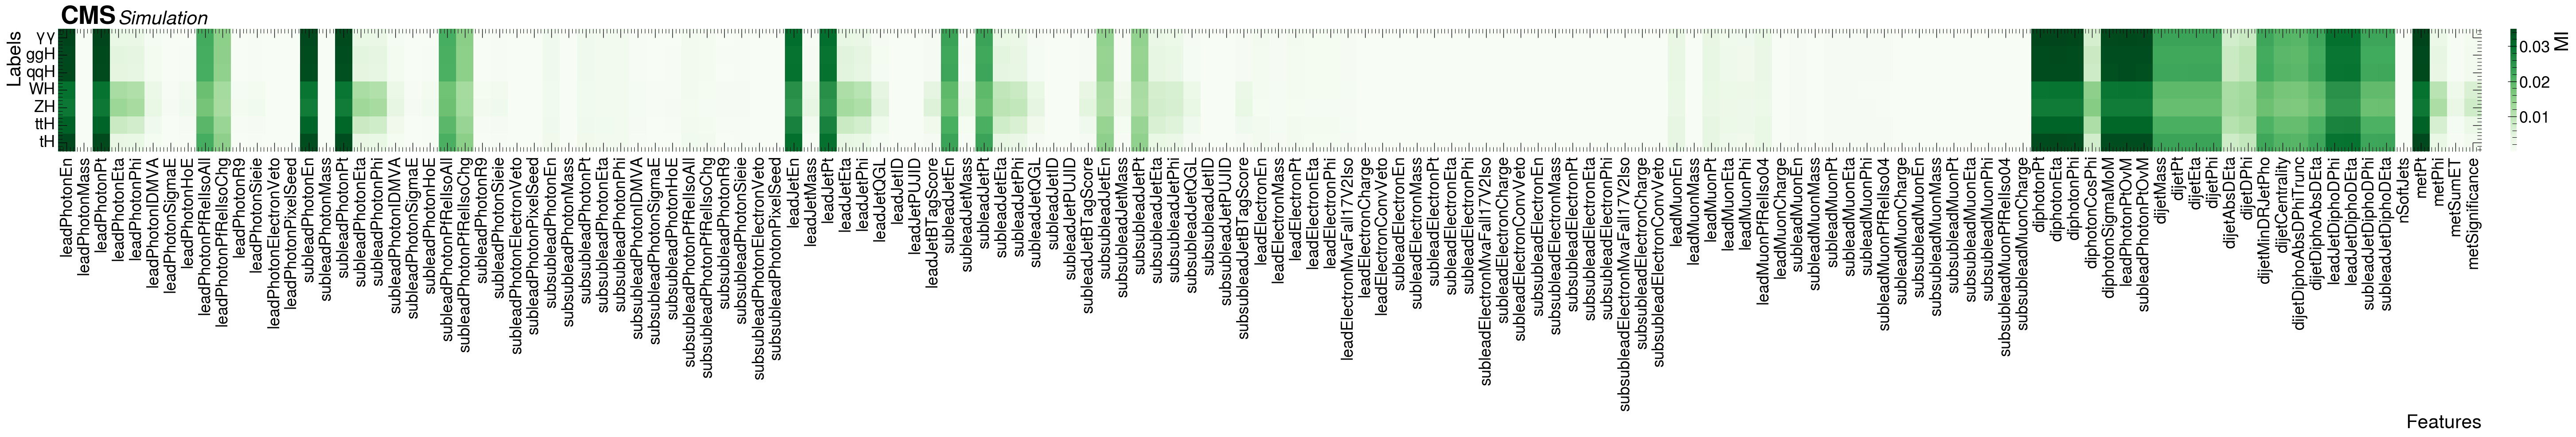

In [217]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(70,3))
sns.heatmap(dfMI.T,yticklabels=col,xticklabels=dfMI.index,cmap='Greens',cbar_kws={"pad": 0.01})
hep.cms.label(ax=ax,rlabel="")
plt.xlabel('Features')
plt.ylabel('Labels')
cbar = ax.collections[0].colorbar
cbar.set_label('MI')
fig.tight_layout()
fig.savefig('/vols/cms/hw423/WeekF/plots/MI.pdf',bbox_inches='tight')



In [33]:
mi1

0.43015778846208097